# Linear Regression, Ridge and Lasso

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df=fetch_california_housing()

In [17]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
type(df)

sklearn.utils._bunch.Bunch

In [24]:
target=pd.DataFrame(df.target)
target.columns= df.target_names

In [25]:
target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [14]:
dataset = pd.DataFrame(df.data)
dataset.columns=df.feature_names


In [18]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [28]:
data=pd.concat([dataset,target],axis=1)

In [29]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## dividing the dataset into train and test data

In [30]:
X= dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
mse =  cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.44245461729225505


In [35]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = lin_reg.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred=y_pred)
r2 = r2_score(y_test, y_pred)
print("mse",mse)
print("rmse",np.sqrt(mse))
print("R2 Score:", r2)

mse 0.4925811329750828
rmse 0.7018412448517705
R2 Score: 0.8776880264277429


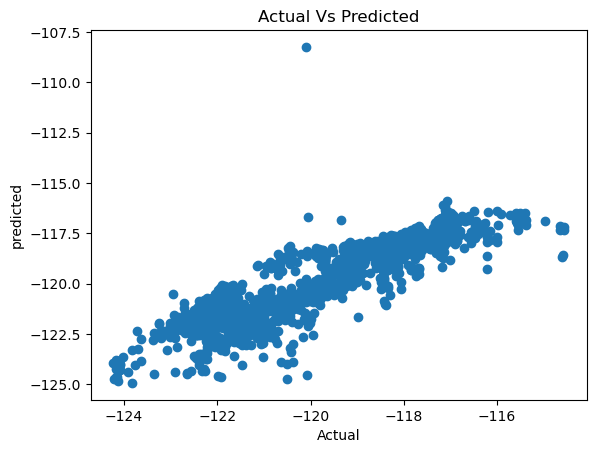

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Actual Vs Predicted")
plt.show()


# Ridge Regression

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# parameter tunning
ridge=Ridge() 
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

ridge_regressor = GridSearchCV(ridge,params, scoring = 'neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [59]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-0.4424546172922554


In [62]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# parameter tunning
lasso=Lasso() 
params = {'alpha':[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}

lasso_regressor = GridSearchCV(lasso,params, scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [63]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-0.4424706376665292


In [67]:
predictions = lasso_regressor.predict(X_test)
predictions

array([-120.94510977, -118.71745232, -117.04118667, ..., -118.89856497,
       -120.6230038 , -120.46075407])

In [69]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test,y_pred)
r2score

0.8776880264277429